In [7]:
import cv2 as cv
import numpy as np

img = cv.imread(r'C:\Users\User\Desktop\predictions\testing_carebara_atoma\prediction_Carebara_atoma_180.tif',0)
kernel = np.ones((5,5),np.uint8)
#cv.imshow('img',img)
#erosion = cv.erode(img,kernel,iterations = 1)
#dilation = cv.dilate(img,kernel,iterations = 1)
#opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
#tophat = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel)
#blackhat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel)
#gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)
#hitmiss = cv.morphologyEx(img, cv.MORPH_HITMISS, kernel, iterations = 3)

In [8]:

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline 

import SimpleITK as sitk

import numpy as np
import random


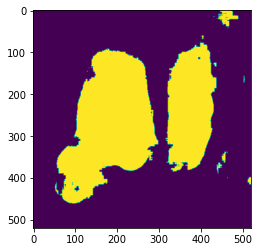

In [9]:
plt.imshow(img)

In [10]:
plt.imshow(opening)

NameError: name 'opening' is not defined

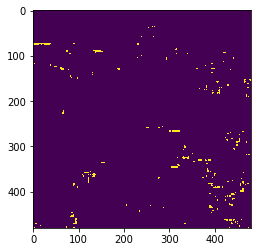

In [9]:
plt.imshow(tophat)

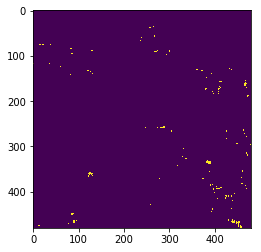

In [11]:
plt.imshow(blackhat)

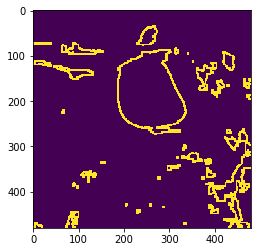

In [13]:
plt.imshow(gradient)

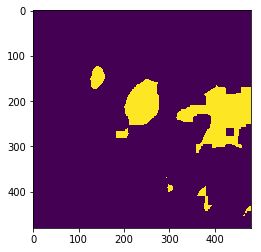

In [49]:
plt.imshow(hitmiss)

In [21]:
img = cv.imread(r'F:\\U-Net\prediction_Atta-texana_490.tif',0)
import skimage
from skimage import measure

labels_mask = measure.label(img)                       
regions = measure.regionprops(labels_mask)
regions.sort(key=lambda x: x.area, reverse=True)
if len(regions) > 1:
    for rg in regions[1:]:
        labels_mask[rg.coords[:,0], rg.coords[:,1]] = 0
labels_mask[labels_mask!=0] = 1
mask = labels_mask

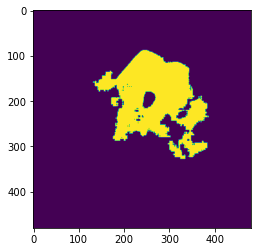

In [22]:
plt.imshow(mask)

In [23]:
import cv2 as cv
import skimage 
from skimage import measure

for i in range(1,995):
    img = cv.imread(r'F:\\U-Net\prediction_Atta-texana_'+str(i)+'.tif',0)
    labels_mask = measure.label(img)                       
    regions = measure.regionprops(labels_mask)
    regions.sort(key = lambda x: x.area, reverse = True)
    if len(regions) > 1:
        for rg in regions[1:]:
            labels_mask[rg.coords[:,0], rg.coords[:,1]] = 0
    labels_mask[labels_mask!=0] = 1
    #mask = labels_mask
    mask = sitk.GetImageFromArray(labels_mask)
    #plt.imshow(mask)
    mask = sitk.Cast(sitk.RescaleIntensity(mask),sitk.sitkUInt8)
    sitk.WriteImage(mask, r'F:\\U-Net\prediction2_Atta-texana_'+str(i)+'.tif')

In [2]:
import numpy as np
import cv2 as cv
im = cv.imread('prediction190.tif')
imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

In [5]:
cv.drawContours(imgray, contours, -1, (0,255,0), 3)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [11]:
cnt = contours[4]
cv.drawContours(imgray, [cnt], 0, (0,255,0), 3)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

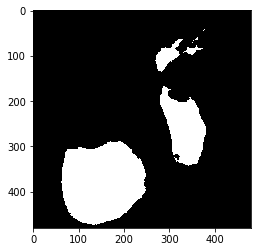

In [13]:
plt.imshow(imgray, cmap='gray')

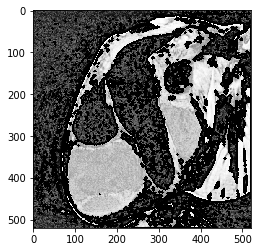

In [24]:
import numpy as np
import cv2 as cv

im = cv.imread('Brachymyrmex_depilis_190.tif') #raw RGB image
im2 = cv.cvtColor(im,cv.COLOR_BGR2GRAY) #gray scale image
plt.imshow(im2,cmap = 'gray')

thresh, im_bw = cv.threshold(im2, 127, 255, cv.THRESH_BINARY) #im_bw: binary image
contours, hierarchy = cv.findContours(im_bw,cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
cv.drawContours(im2, contours, -1, (0,255,0), 3)
plt.imshow(im2,cmap='gray')  

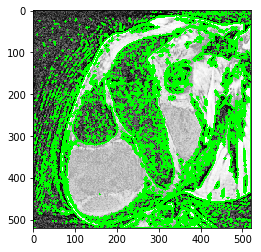

In [25]:
cv.drawContours(im, contours, -1, (0,255,0), 3)
plt.imshow(im,cmap='gray')

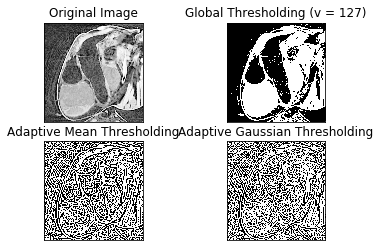

In [8]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('Brachymyrmex_depilis_190.tif',0)
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

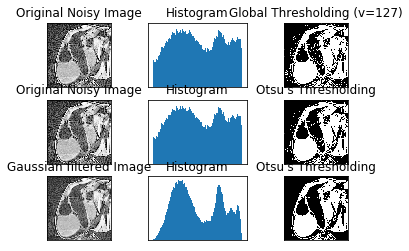

In [6]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('Brachymyrmex_depilis_190.tif',0)
# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])